# 머신러닝의 기초를 다집니다 - 수치예측
## 03-1 선형 회귀에 대해 알아보고 데이터를 준비합니다.

선형회귀는 기울기와 절편을 찾아줍니다.
데이터를 오차율이 가장 적게 지나가는 직선의 기울기와 절편을 찾고 이를 통해 특정 데이터가 주어졌을 때 결과를 예측할 수 있습니다.

사이킷런에서 당뇨병 환자 데이터 가져오기

In [0]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

diabetes 변수에 저장된 값은 dictionary 와 유사한 Bunch 클래스

입력과 타깃 데이터의 크기 확인하기

In [0]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [0]:
#입력 데이터 자세히 보기
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

실무에서는 데이터 준비에 많은 공을 들입니다.

## 당노병 환자 데이터 시각화 하기

1. 맷플롯립의 scatter() 함수로 산점도 그리기


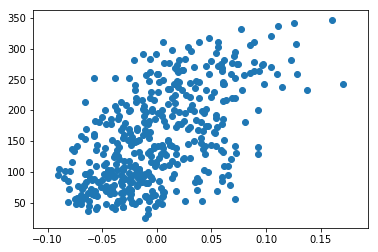

In [3]:
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.show()

그래프를 보면 data의 3번째 항목과 y의 값이 양의 상관 관례를 보임을 알 수 있다. 따라서 우리는 data의 3번째 황목과 y를 통해 선형 회귀를 실행할 것이다.

In [0]:
x = diabetes.data[:, 2]
y = diabetes.target

훈련 데이터에 잘 맞는 w와 b를 찾는 방법

1. 무작위로 w와 b를 정합니다.
2. x에서 샘플 하나를 선택해서 y-hat 을 구합니다.
3. y-hat과 진짜 y를 비교합니다.
4. y-hat 과 y가 더 가까워지도록 w, b를 조정합니다.
5. 모든 샘플을 처리할 때까지 2~4 항목을 반복합니다.

In [0]:
w = 1.0
b = 1.0

In [0]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [0]:
print(y[0])

151.0


In [0]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [0]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


이렇게 변화 시킬 수 있지만 문제점이 많다. 이를 오차 역전파(backpropagation)를 통해서 더 적절하게 업데이트 할 수 있다.

1. 오차와 변화율을 곱하여 가중치 업데이트하기

In [0]:
err = y[0] - y_hat
w_new = w + w_rate*err
b_new = b + 1*err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [0]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate*err
b_new = b_new + 1*err
print(w_new,b_new) 

14.132317616381767 75.52764127612664


In [0]:
w=1.0
b=1.0
for x_i, y_i in zip(x,y):
  y_hat = x_i* w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate*err
  b = b + 1 * err

print(w, b)

587.8654539985689 99.40935564531424


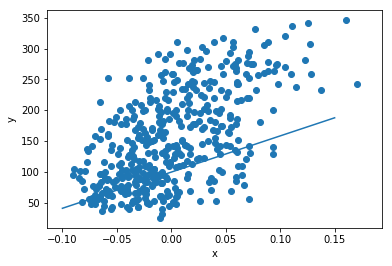

In [0]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.15, 0.15*w + b)

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
w=1.0
b=1.0
for i in range(1, 100) :
  for x_i, y_i in zip(x,y):
    y_hat = x_i* w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate*err
    b = b + 1 * err

print(w, b)

913.5973364345905 123.39414383177204


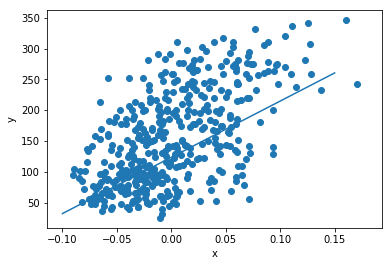

In [0]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.15, 0.15*w + b)

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
x_new = 0.18
y_pred = x_new*w + b
print(y_pred)

287.8416643899983


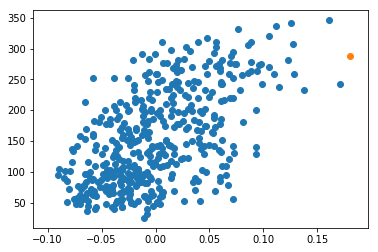

In [0]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.show()

지금까지 배운 경사 하강법 알고리즘을 Neuron 이라는 이름의 파이썬 클래스로 만들어 보겠습니다.

In [0]:
class Neuron:
  
  def __init__(self):
    self.w = 1.0
    self.b = 1.0
   
  def forpass(self,x):
    return x * self.w + self.b #return w_hat
  
  def backprop(self, x, err):
    return x*err, 1*err #return w_grad, b_grad
  
  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
        

In [0]:
neuron = Neuron()
neuron.fit(x,y)

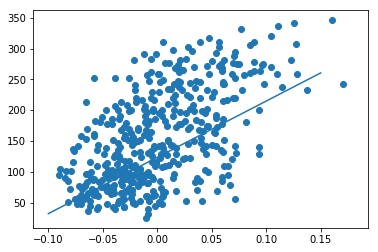

In [6]:
plt.scatter(x,y)
pt1 = (-0.1,-0.1*neuron.w + neuron.b )
pt2 = (0.15,0.15*neuron.w + neuron.b )
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.show()

In [0]:
neuron.fit(x,y,1000)

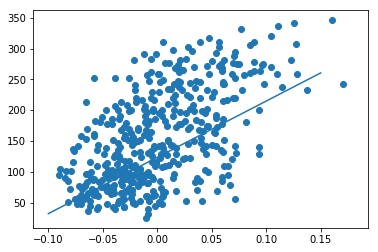

In [8]:
plt.scatter(x,y)
pt1 = (-0.1,-0.1*neuron.w + neuron.b )
pt2 = (0.15,0.15*neuron.w + neuron.b )
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.show()

In [9]:
neuron.w

913.5973364345905